# AI YOUTH CAMP

### Hendrik Santoso Sugiarto, Ph.D.
### Calvin Institute of Technology

RNN
---
Mekanisme RNN menggunakan nilai hidden layer dari proses sebelumnya untuk menjadi input tambahan pada proses berikutnya.


### Tugas
Tempelkan (concatenate) hidden layer yang didapatkan dari proses sebelumnya dengan input data berikutnya untuk menjadi input data yang baru untuk proses setelahnya.

In [1]:
import torch

class RNN(torch.nn.Module):

    # you can also accept arguments in your model constructor
    def __init__(self, data_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        input_size = data_size + hidden_size

        self.i2h = torch.nn.Linear(input_size, hidden_size)
        self.h2o = torch.nn.Linear(input_size, output_size)

    def forward(self, data, last_hidden):
        input_data = torch.cat((data, last_hidden), 1)
        hidden = torch.tanh(self.i2h(input_data))
        output = self.h2o(input_data)

        return hidden, output


rnn = RNN(50, 20, 10)

### Tugas

Hitung total akumulasi loss function untuk setiap proses dan lakukan backwardpropagation sekali saja

In [2]:
learning_rate = 0.005
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate)

batch_size = 16
timestep = 5

# Create some fake data
batch = torch.randn(batch_size, 50)
hidden = torch.zeros(batch_size, 20)
target = torch.zeros(batch_size, 10)

print(rnn.i2h.weight)

loss = 0
for t in range(timestep):
    # yes! you can reuse the same network several times,
    # sum up the losses, and call backward!
    hidden, output = rnn(batch, hidden)
    loss += loss_fn(output, target)
loss.backward()
optimizer.step()
print(loss)
print(rnn.i2h.weight)




Parameter containing:
tensor([[-0.1129, -0.0880, -0.0338,  ..., -0.0881,  0.1130,  0.0795],
        [-0.0254, -0.0028,  0.0742,  ...,  0.1095,  0.0287, -0.0713],
        [ 0.0577, -0.0422,  0.1084,  ...,  0.0829, -0.0661, -0.0390],
        ...,
        [ 0.0307, -0.1126,  0.0653,  ...,  0.0007,  0.0890, -0.1177],
        [ 0.0876,  0.0004, -0.0028,  ..., -0.0654, -0.0760, -0.0178],
        [ 0.1035, -0.0101,  0.0853,  ...,  0.0677,  0.0827, -0.0292]],
       requires_grad=True)
tensor(1.6884, grad_fn=<AddBackward0>)
Parameter containing:
tensor([[-0.1179, -0.0830, -0.0288,  ..., -0.0831,  0.1180,  0.0845],
        [-0.0204, -0.0078,  0.0692,  ...,  0.1145,  0.0337, -0.0763],
        [ 0.0627, -0.0372,  0.1134,  ...,  0.0779, -0.0611, -0.0340],
        ...,
        [ 0.0357, -0.1176,  0.0603,  ..., -0.0043,  0.0840, -0.1127],
        [ 0.0926, -0.0046,  0.0022,  ..., -0.0604, -0.0710, -0.0128],
        [ 0.1085, -0.0051,  0.0803,  ...,  0.0627,  0.0877, -0.0342]],
       requires_grad=T

Data
==================

   Unduh data ini https://download.pytorch.org/tutorial/data.zip
   dan taruh pada folder yang sama dengan notebook ini

data ini berisi dictionary dari daftar nama dari tiap bahasa



In [3]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

['data/names\\Arabic.txt', 'data/names\\Chinese.txt', 'data/names\\Czech.txt', 'data/names\\Dutch.txt', 'data/names\\English.txt', 'data/names\\French.txt', 'data/names\\German.txt', 'data/names\\Greek.txt', 'data/names\\Irish.txt', 'data/names\\Italian.txt', 'data/names\\Japanese.txt', 'data/names\\Korean.txt', 'data/names\\Polish.txt', 'data/names\\Portuguese.txt', 'data/names\\Russian.txt', 'data/names\\Scottish.txt', 'data/names\\Spanish.txt', 'data/names\\Vietnamese.txt']
Slusarski


Sekarang kita mempunyai variabel ``category_lines``, dictionary yang memetakan setiap kategori bahasa ke sebuah daftar nama-nama. Kita juga melacak ``all_categories`` (daftar bahasa) dan ``n_categories`` untuk referensi.




In [4]:
print(category_lines['English'][:25])
print(category_lines['Spanish'][:25])
print(category_lines['Italian'][:25])
print(category_lines['German'][:25])
print(category_lines['French'][:25])
print(category_lines['Dutch'][:25])
print(category_lines['Russian'][:25])
print(category_lines['Japanese'][:25])
print(category_lines['Korean'][:25])
print(all_categories)

['Abbas', 'Abbey', 'Abbott', 'Abdi', 'Abel', 'Abraham', 'Abrahams', 'Abrams', 'Ackary', 'Ackroyd', 'Acton', 'Adair', 'Adam', 'Adams', 'Adamson', 'Adanet', 'Addams', 'Adderley', 'Addinall', 'Addis', 'Addison', 'Addley', 'Aderson', 'Adey', 'Adkins']
['Abana', 'Abano', 'Abarca', 'Abaroa', 'Abascal', 'Abasolo', 'Abel', 'Abello', 'Aberquero', 'Abreu', 'Acosta', 'Agramunt', 'Aiza', 'Alamilla', 'Albert', 'Albuquerque', 'Aldana', 'Alfaro', 'Alvarado', 'Alvarez', 'Alves', 'Amador', 'Andreu', 'Antunez', 'Aqua']
['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni', 'Abatescianni', 'Abba', 'Abbadelli', 'Abbascia', 'Abbatangelo', 'Abbatantuono', 'Abbate', 'Abbatelli', 'Abbaticchio', 'Abbiati', 'Abbracciabene', 'Abbracciabeni', 'Abelli', 'Abello', 'Abrami', 'Abramo', 'Acardi', 'Accardi', 'Accardo', 'Acciai']
['Abbing', 'Abel', 'Abeln', 'Abt', 'Achilles', 'Achterberg', 'Acker', 'Ackermann', 'Adam', 'Adenauer', 'Adler', 'Adlersflugel', 'Aeschelman', 'Albert', 'Albrecht', 'Aleshire', 'A

Mengubah Nama Menjadi Tensor
--------------------------

Sekarang kita memiliki susunan nama, kita perlu merubahnya menjadi tensor

Untuk merepresentasikan sebuah huruf, kita menggunakan "one-hot vector" dengan ukuran
``<1 x n_letters>``. Contoh: ``"b" = <0 1 0 0 0 ...>``.

Untuk membuat sebuah kata, kita menyatukan beberapa vektor menjadi matriks 2D
``<line_length x 1 x n_letters>``.

1 Dimensi tambahan karena PyTorch selalu menghitung dalam batch (kita menggunakan batch size=1)



In [5]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('d'))
print(lineToTensor('data'))
print(lineToTensor('data').size())

tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
tensor([[[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.

Membuat Network
====================

Modul RNN ini menggunakan 2 linear layers antara input dan hidden state dengan LogSoftmax pada output.




Tugas
---
Tempel (concatenate) input data dan hidden layer, lalu gunakan combined data sebagai input untuk forward propagation pada hidden layer dan output layer


In [6]:
class RNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = torch.nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = torch.nn.Linear(input_size + hidden_size, output_size)
        self.softmax = torch.nn.LogSoftmax(dim=1)

    def forward(self, input_data, hidden):
        combined = torch.cat((input_data, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
print(n_letters, n_hidden, n_categories)
rnn = RNN(n_letters, n_hidden, n_categories)
rnn

57 128 18


RNN(
  (i2h): Linear(in_features=185, out_features=128, bias=True)
  (i2o): Linear(in_features=185, out_features=18, bias=True)
  (softmax): LogSoftmax(dim=1)
)

In [7]:
input_data = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input_data, hidden)
print(output)
print(next_hidden)

tensor([[-2.7962, -2.9042, -3.0095, -2.8598, -2.8591, -2.9344, -2.7835, -2.9630,
         -2.9864, -2.9594, -2.7774, -2.9687, -2.9665, -2.8835, -2.8528, -2.8511,
         -2.8661, -2.8488]], grad_fn=<LogSoftmaxBackward0>)
tensor([[-7.8033e-02, -9.1848e-02, -3.0915e-02,  3.5220e-02,  6.0134e-02,
          1.4228e-02,  3.7225e-03,  8.6543e-03, -3.5936e-02, -1.7841e-02,
          5.4447e-02,  4.2601e-02,  3.2324e-02,  2.9369e-02,  5.9669e-02,
         -2.5907e-02,  2.2394e-02, -7.8698e-02, -2.4158e-02, -1.7210e-02,
         -6.8340e-02,  7.8291e-02, -8.8172e-02, -1.4184e-01, -4.3496e-02,
         -7.6770e-02, -9.0627e-02,  1.5789e-02, -5.8830e-05,  2.9649e-02,
          6.9715e-02, -3.2863e-04, -3.0031e-02, -3.5279e-02,  3.5322e-02,
          4.6218e-02, -1.2011e-02,  1.1343e-01, -6.1316e-03, -1.2296e-01,
         -1.5642e-02, -8.8314e-02, -5.7510e-02,  1.7064e-02, -4.1365e-02,
          1.5959e-02,  3.1144e-02,  3.1067e-02,  3.0246e-02, -2.2566e-02,
          3.9390e-02, -4.3071e-02, -7.

In [8]:
input_data = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input_data[0], hidden)
print(output)
print(next_hidden)

tensor([[-2.7962, -2.9042, -3.0095, -2.8598, -2.8591, -2.9344, -2.7835, -2.9630,
         -2.9864, -2.9594, -2.7774, -2.9687, -2.9665, -2.8835, -2.8528, -2.8511,
         -2.8661, -2.8488]], grad_fn=<LogSoftmaxBackward0>)
tensor([[-7.8033e-02, -9.1848e-02, -3.0915e-02,  3.5220e-02,  6.0134e-02,
          1.4228e-02,  3.7225e-03,  8.6543e-03, -3.5936e-02, -1.7841e-02,
          5.4447e-02,  4.2601e-02,  3.2324e-02,  2.9369e-02,  5.9669e-02,
         -2.5907e-02,  2.2394e-02, -7.8698e-02, -2.4158e-02, -1.7210e-02,
         -6.8340e-02,  7.8291e-02, -8.8172e-02, -1.4184e-01, -4.3496e-02,
         -7.6770e-02, -9.0627e-02,  1.5789e-02, -5.8830e-05,  2.9649e-02,
          6.9715e-02, -3.2863e-04, -3.0031e-02, -3.5279e-02,  3.5322e-02,
          4.6218e-02, -1.2011e-02,  1.1343e-01, -6.1316e-03, -1.2296e-01,
         -1.5642e-02, -8.8314e-02, -5.7510e-02,  1.7064e-02, -4.1365e-02,
          1.5959e-02,  3.1144e-02,  3.1067e-02,  3.0246e-02, -2.2566e-02,
          3.9390e-02, -4.3071e-02, -7.

As you can see the output is a ``<1 x n_categories>`` Tensor, where
every item is the likelihood of that category (higher is more likely).




Training
========
Persiapan pelatihan
----------------------

Sebelum melatih, kita memerlukan fungsi tambahan.
Fungsi ini untuk memperoleh kategori dari outputnya




In [9]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Japanese', 10)


Kita juga memerlukan fungsi untuk menghasilkan training data (nama dan bahasanya)




In [10]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line, '/ category_size =', category_tensor.shape, '/ line_size =', line_tensor.shape)

category = Scottish / line = Murphy / category_size = torch.Size([1]) / line_size = torch.Size([6, 1, 57])
category = Arabic / line = Shammas / category_size = torch.Size([1]) / line_size = torch.Size([7, 1, 57])
category = Russian / line = Rogalnikov / category_size = torch.Size([1]) / line_size = torch.Size([10, 1, 57])
category = Greek / line = Rousses / category_size = torch.Size([1]) / line_size = torch.Size([7, 1, 57])
category = Portuguese / line = Simoes / category_size = torch.Size([1]) / line_size = torch.Size([6, 1, 57])
category = Greek / line = Makricosta / category_size = torch.Size([1]) / line_size = torch.Size([10, 1, 57])
category = German / line = Langenberg / category_size = torch.Size([1]) / line_size = torch.Size([10, 1, 57])
category = Spanish / line = Franco / category_size = torch.Size([1]) / line_size = torch.Size([6, 1, 57])
category = Arabic / line = Essa / category_size = torch.Size([1]) / line_size = torch.Size([4, 1, 57])
category = Scottish / line = Mclea

Melatih Network
--------------------

Untuk loss function akan menggunakan ``nn.NLLLoss`` karena lapisan terakhir RNN ini adalah ``nn.LogSoftmax``.




In [11]:
criterion = torch.nn.NLLLoss()

### Tugas

Setiap training loop akan melakukan:
- Membuat input dan target tensor
- Mengosongkan gradien
- For loop setiap huruf untuk:
    - Membaca setiap huruf dan menyimpan hidden state untuk huruf berikutnya (Tugas)

- Membandingkan output akhir dengan kategori
- Backpropagation
- Menghasilkan output dan loss





In [12]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

### Tugas

print untuk setiap ``print_every``, lalu hitung loss rata-rata dan plot perubahan pada loss




5000 5% (0m 4s) 2.7360 Zubizarreta / Czech ✗ (Spanish)
10000 10% (0m 9s) 1.3479 Schoonenburg / Dutch ✓
15000 15% (0m 14s) 0.5676 Sasaki / Japanese ✓
20000 20% (0m 19s) 0.9553 Agatov / Russian ✓
25000 25% (0m 23s) 5.5269 Chuta / Japanese ✗ (Russian)
30000 30% (0m 28s) 3.2315 Grant / Vietnamese ✗ (Scottish)
35000 35% (0m 32s) 2.5196 Miazga / Japanese ✗ (Polish)
40000 40% (0m 37s) 1.5734 Gaber / German ✗ (Arabic)
45000 45% (0m 42s) 1.9814 Pae / Chinese ✗ (Korean)
50000 50% (0m 46s) 1.2749 Nadvornizch / Russian ✗ (Czech)
55000 55% (0m 51s) 0.4647 Shigi / Japanese ✓
60000 60% (0m 55s) 5.2313 Paulis / Greek ✗ (Dutch)
65000 65% (1m 0s) 1.9970 Biermann / English ✗ (German)
70000 70% (1m 5s) 0.3268 Mckay / Scottish ✓
75000 75% (1m 9s) 2.0524 Medina / Czech ✗ (Spanish)
80000 80% (1m 14s) 3.0693 Mayer / Arabic ✗ (Czech)
85000 85% (1m 19s) 0.6108 Cuidightheach / Irish ✓
90000 90% (1m 24s) 1.2960 Pape / French ✓
95000 95% (1m 29s) 1.3802 Chin / Korean ✗ (Chinese)
100000 100% (1m 34s) 0.6806 Alesi /

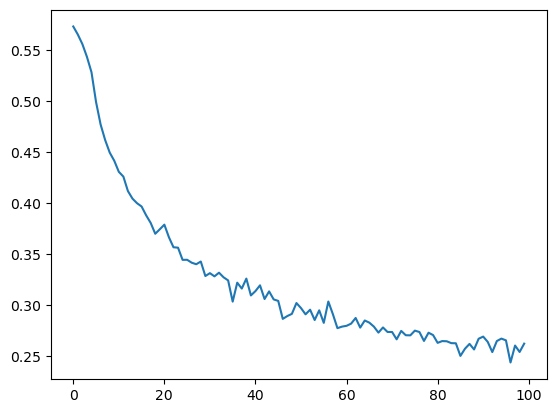

In [15]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss/print_every)
        current_loss = 0


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)


Evaluasi
======================

Untuk melihat performa network pada kategori yang berbeda, kita akan membuat sebuah confusion matrix, sebagai indikator untuk setiap input bahasa (baris), bahasa manakah yang ditebak (kolom). Untuk menghitung confusion matrix, sampel akan melewati network melalui fungsi ``evaluate()``, dimana identik dengan fungsi ``train()`` kecuali bagian backprop.




C:\Users\andre\AppData\Local\Temp\ipykernel_12644\3585656379.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
C:\Users\andre\AppData\Local\Temp\ipykernel_12644\3585656379.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


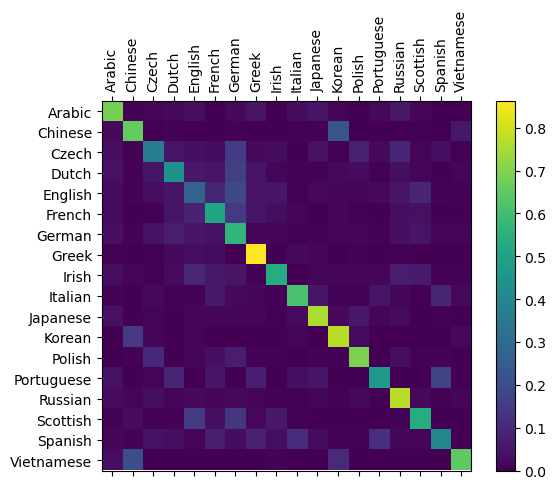

In [16]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

Prediksi pada Input Apapun
---------------------




In [ ]:
def predict(input_line, n_predictions=5):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Hendrik')
predict('Leonardo')

### Tugas

Coba modifikasi struktur network, misalnya menambah beberapa lapisan linear
    




### 2 hidden layers

In [ ]:
class RNN2L(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN2L, self).__init__()

        self.hidden_size = hidden_size

        self.i2h =
        self.h2h =
        self.i2o =
        self.softmax = torch.nn.LogSoftmax(dim=1)

    def forward(self, input_data, hidden):
        combined =
        hidden =
        hidden =
        output =
        output =
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
print(n_letters, n_hidden, n_categories)
rnn = RNN2L(n_letters, n_hidden, n_categories)
rnn

In [ ]:
n_iters = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)


In [ ]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

def predict(input_line, n_predictions=5):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Hendrik')
predict('Leonardo')

Time Series
---
Modelkan Melbourne Temperature (1981-1990) dengan menggunakan RNN. Latih 90% data awal untuk mempredikti 10% data akhir

In [ ]:
dtype = torch.FloatTensor
input_size, hidden_size, output_size = 7, 6, 1
epochs = 300
lr = 0.1
ts_data = pd.read_csv("melbourne_temperature_1981-1990.txt")
data = np.array(ts_data['Temp'])
seq_length = len(data)-1
data_time_steps = np.array(ts_data.index)
data.resize(len(data), 1)

plt.plot(data)

LSTM & GRU
---
RNN sangat terbatas untuk sequence yang panjang. LSTM dan GRU memodifikasi RNN untuk dapat memodelkan sequence panjang menggunakan long term memory dan short term memory. Cobalah pelajari sendiri bagaimana LSTM & GRU bekerja dan aplikasikan pada kedua dataset diatas.